In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
train = pd.read_csv('train.csv')
train.head()

/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_93452/3062304800.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
# Фильтрация датасета
train_poor_credit = train[train["Credit_Score"] == "Poor"]

# Получим распределение Payment_Behaviour для клиентов с плохими кредиатми
payment_behaviour_counts = train_poor_credit["Payment_Behaviour"].value_counts()
payment_behaviour_counts

Low_spent_Small_value_payments      9125
High_spent_Medium_value_payments    4439
Low_spent_Medium_value_payments     4211
High_spent_Small_value_payments     3088
High_spent_Large_value_payments     2979
Low_spent_Large_value_payments      2931
!@9#%8                              2225
Name: Payment_Behaviour, dtype: int64

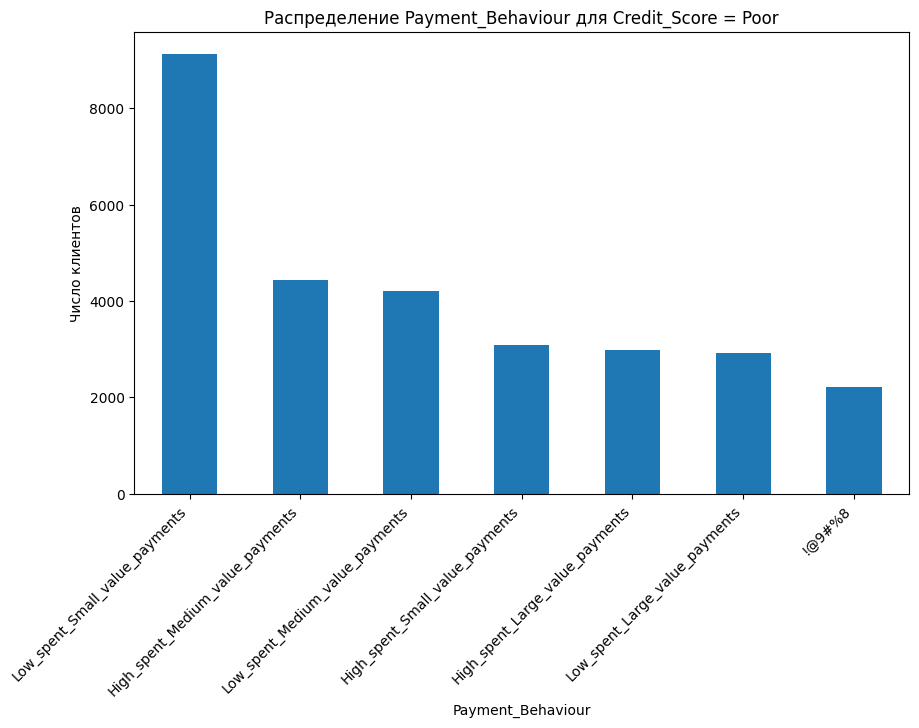

In [5]:
plt.figure(figsize=(10, 6))
payment_behaviour_counts.plot(kind='bar')

plt.title("Распределение Payment_Behaviour для Credit_Score = Poor")
plt.xlabel("Payment_Behaviour")
plt.ylabel("Число клиентов")
plt.xticks(rotation=45, ha="right")

plt.show()


In [6]:
train.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
train = train.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])
train = train.dropna()

numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                   'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 
                   'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numeric_columns:
    train[col] = pd.to_numeric(train[col], errors='coerce')

le = LabelEncoder()

train['Credit_Score'] = le.fit_transform(train['Credit_Score'])
train = train.select_dtypes(include=[np.number])
train = train.dropna()

print(f"Осталось {len(train)} объектов в выборке.")

Осталось 44568 объектов в выборке.


In [9]:
# Разделение данных на признаки и целевую переменную
X = train.drop(columns=['Credit_Score'])
y = train['Credit_Score']

# Разбиение на обучение и тест с соотношением 80/20, стратификацией и random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Обучение модели SVC с параметрами по умолчанию
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Получение опорных векторов
support_vectors = svc_model.support_vectors_

# Количество опорных векторов
num_support_vectors = support_vectors.shape[0]
num_support_vectors


31337

In [10]:
# Фиксируем случайность и выбираем случайные подвыборки
np.random.seed(1)
train_indices = np.random.choice(len(X_train), 10000, replace=False)

np.random.seed(2)
test_indices = np.random.choice(len(X_test), 2000, replace=False)

# Создаем уменьшенные выборки
X_train_small = X_train.iloc[train_indices]
y_train_small = y_train.iloc[train_indices]

X_test_small = X_test.iloc[test_indices]
y_test_small = y_test.iloc[test_indices]

# Создаем pipeline с масштабированием данных и SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC())

# Обучаем модель
svc_pipeline.fit(X_train_small, y_train_small)

# Делаем предсказания
y_pred = svc_pipeline.predict(X_test_small)

# Вычисляем метрику recall
report = classification_report(y_test_small, y_pred, output_dict=True)

# Округляем значения recall до второго знака
recall_scores = {cls: round(metrics["recall"], 2) for cls, metrics in report.items() if cls.isdigit()}
recall_scores


{'0': 0.02, '1': 0.5, '2': 0.85}

In [11]:
from sklearn.metrics import recall_score

# Определим список ядер для тестирования
kernels = ['linear', 'rbf', 'poly']
best_kernel = None
best_recall = 0

# Перебираем ядра и обучаем модели
for kernel in kernels:
    # Создаем pipeline с масштабированием и SVC
    svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel=kernel))
    
    # Обучаем модель
    svc_pipeline.fit(X_train_small, y_train_small)
    
    # Делаем предсказания
    y_pred = svc_pipeline.predict(X_test_small)
    
    # Вычисляем метрику recall с макро-усреднением
    recall_macro = recall_score(y_test_small, y_pred, average='macro')
    
    # Сравниваем и обновляем лучший результат
    if recall_macro > best_recall:
        best_recall = recall_macro
        best_kernel = kernel

# Округляем лучший recall до 2 знаков
best_kernel, round(best_recall, 2)


('rbf', 0.46)

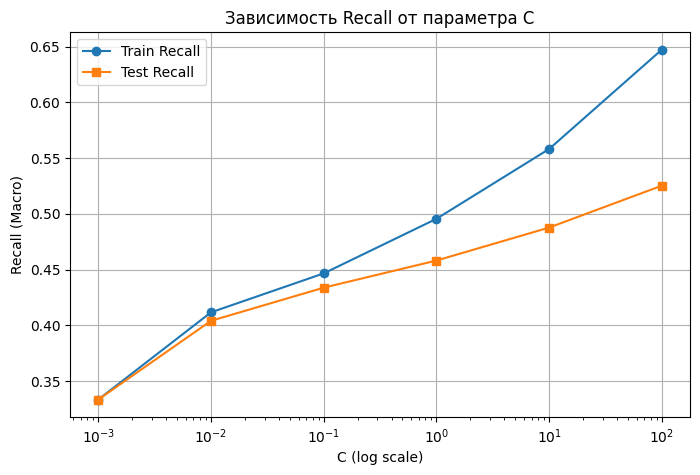

(100, 0.53)

In [12]:
# Список значений C для подбора
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Оптимизированный перебор значений C
train_recalls = []
test_recalls = []

for C in C_values:
    svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel=best_kernel, C=C))
    svc_pipeline.fit(X_train_small, y_train_small)

    # Предсказания
    y_train_pred = svc_pipeline.predict(X_train_small)
    y_test_pred = svc_pipeline.predict(X_test_small)

    # Вычисление recall с макро-усреднением
    recall_train = recall_score(y_train_small, y_train_pred, average='macro')
    recall_test = recall_score(y_test_small, y_test_pred, average='macro')

    # Сохранение результатов
    train_recalls.append(recall_train)
    test_recalls.append(recall_test)

# Находим лучшее значение C
best_C_index = np.argmax(test_recalls)
best_C = C_values[best_C_index]
best_recall = round(test_recalls[best_C_index], 2)

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_recalls, marker='o', label="Train Recall")
plt.plot(C_values, test_recalls, marker='s', label="Test Recall")
plt.xscale("log")  # Логарифмическая шкала для C
plt.xlabel("C (log scale)")
plt.ylabel("Recall (Macro)")
plt.title("Зависимость Recall от параметра C")
plt.legend()
plt.grid(True)
plt.show()

# Вывод лучшего C и recall
best_C, best_recall

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Обучение SVC с вероятностями
best_svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel=best_kernel, C=best_C, probability=True))
ovr_svc = OneVsRestClassifier(best_svc_pipeline)

# Обучение модели
ovr_svc.fit(X_train_small, y_train_small)

# Получение вероятностей классов
y_probs = ovr_svc.predict_proba(X_test_small)

# Вычисление ROC-AUC с multi_class='ovr'
roc_auc = roc_auc_score(y_test_small, y_probs, multi_class='ovr')

# Округление до 2 знаков
round(roc_auc, 2)


0.74

In [17]:
from sklearn.model_selection import cross_val_score

# Определяем гиперпараметры для перебора
kernels = ['rbf', 'poly']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_kernel = None
best_C = None
best_recall_cv = 0

# Перебор ядер и значений C
for kernel in kernels:
    for C in C_values:
        # Создаем пайплайн с масштабированием и SVC
        svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel=kernel, C=C))
        
        # Кросс-валидация на 3 фолда с recall_macro
        recall_scores = cross_val_score(svc_pipeline, X_train_small, y_train_small, cv=3, scoring="recall_macro")
        
        # Усредняем recall
        mean_recall = recall_scores.mean()
        
        # Обновляем лучшие параметры
        if mean_recall > best_recall_cv:
            best_recall_cv = mean_recall
            best_kernel = kernel
            best_C = C

# Округление recall
best_recall_cv = round(best_recall_cv, 2)

# Вывод лучших параметров и метрики
best_kernel, best_C, best_recall_cv

('rbf', 100, 0.53)